In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
ds = pd.read_csv('/content/drive/MyDrive/Dataset Produk Pupuk.csv')
ds.head()

,UserID,ProductID,Rating
0,17,84,1
1,44,84,5
2,38,40,3
3,5,28,5
4,46,40,1


In [28]:
ds.shape

(500, 3)

In [30]:
popular_products = pd.DataFrame(ds.groupby('ProductID')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductID,
92,14
96,12
75,11
54,11
98,10
56,10
87,10
12,9
28,9


<Axes: xlabel='ProductID'>

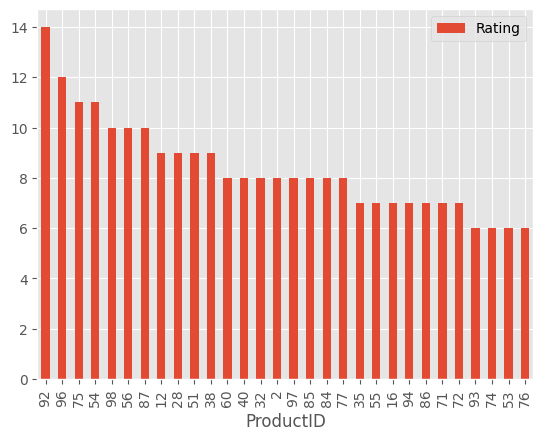

In [31]:
most_popular.head(30).plot(kind = "bar")

In [34]:
ds_util_matrix = ds.pivot_table(values='Rating', index='UserID', columns='ProductID', fill_value=0)
ds_util_matrix.head()

ProductID,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
ds_util_matrix.shape

(50, 101)

In [36]:
X = ds_util_matrix.T
X.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ProductID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X.shape

(101, 50)

In [38]:
X1 = X

In [51]:
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(101, 5)

In [52]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(101, 101)

In [53]:
X.index[10]

11

In [54]:
i = 54

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

53

In [55]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(101,)

In [56]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

[6, 12, 34, 48, 61]